#  **Prediction of the Quality of Red Wine**

We'll train a machine learning model to predict the quality of various red wine given information like its chemical properties, and the amount of sulphates and chlorides present in it.

## Download the Dataset:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [9]:
!pip install plotly

In [3]:
import plotly.express as px

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
dataframe = pd.read_csv('winequality-red.csv')
df = dataframe
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

### Some information regarding the variables of the dataset:

* **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Acidity is a characteristic determined by the total sum of acids that a sample contains. We can quantify the set of all of them in an undifferentiated way (total acidity) or in a grouped way (fixed acidity and volatile acidity). Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.


* **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.Volatile acidity corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.


* **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines. Citric acid is a colorless weak organic acid. It occurs naturally in citrus fruits. In biochemistry, it is an intermediate in the citric acid cycle, which occurs in the metabolism of all aerobic organisms.


* **residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. Residual sugar refers to the sugars left unfermented in a finished wine. It is measured by grams of sugar per litre (g/l). The amount of residual sugar affects a wine's sweetness and, in the EU, the RS level is linked to specific labelling terms.


* **chlorides:** the amount of salt in the wine. The higher extraction of chloride during red winemaking is due to the ions extracted from skins during fermentation. Therefore, red juice should have no more than 356mg/L chloride ions so that finished wine does not exceed the maximum legal level of 606mg/L chloride(356mg/L in red juice x 1.7 = 606).


* **free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion. What is free sulphur dioxide in wine? The free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. The bound sulfites are those that have reacted (both reversibly and irreversibly) with other molecules within the wine medium. The sum of the free and bound sulfites defines the total sulfite concentration.


* **total sulfur dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2. Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.


* **density:** the density of water is close to that of water depending on the percent alcohol and sugar content. How do you measure the density of wine? A hydrometer is an instrument used to measure liquid density. It is a sealed glass tube with a weighted bulb at one end, winemakers use this instrument to measure density of juice, fermenting wine and completed wine in relation to pure water. This ratio is called specific gravity (SG).


* **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4. What is a high pH in wine? Wines which have higher pH values (>3.65) have a series of potential challenges during vinification and aging. First, high pH wines have an increased chance of microbial spoilage. Traditionally, sulfur dioxide (often in the form of potassium metabisulfite) is used to keep wines stable during aging.


* **sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial. Wine sulfites are naturally occurring at low levels in all wines, and are one of the thousands of chemical by-products created during the fermentation process. However, sulfites are also added by the winemaker to preserve and protect the wine from bacteria and yeast-laden invasions. For some, sulfur allergies may be associated with headaches and stuffy sinuses after a glass or two of wine. It is a a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.


* **alcohol:** this is the percent alcohol content of the wine 


* **quality:** output variable (based on sensory data, score between 3 and 8).

## Explore the Dataset: 

##### Finding the number of missing values per column in the dataset: 

In [13]:
dataframe.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataframe does not have any missing values. Therefore, there is no need to perform data cleaning and assigning arbitrary values for the missing data. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Some of the observations are: 
* There are 1599 rows in the dataset
* The quality of most of the red wines is around 5.600 on a scale of 3 to 8
* The density of the different red wines varies from 0.990 to 1.003
* The alcohol content in the wines varies from 8.400 to 14.900
* the pH of the red wines varies from 2.740 to 4.010

### Exploratory Data Analysis: 

#### Residual Sugar: 

Residual Sugar is a numeric column. The minimum residual sugar in the dataset is 0.9000 and the maximum residual sugar is 15.500. Thus, we can visualise the residual sugar column using a histogram and a bar plot. We will use Plotly to make the chart more interactive.

In [6]:
fig = px.histogram(df, 
                   x='residual sugar', 
                   marginal='box', 
                   title='Distribution of Residual Sugar: ')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of the amount of residual sugar seems to be similar to a Gaussian distribution centered around the value 2.5 with a few outliers towards the right.

#### Quality: 
Let's visualize the distribution of 'quality' i.e the quality of the various red wines. This is the column that we are trying to predict.

In [7]:
fig = px.histogram(df, 
                   x='quality', 
                   marginal='box', 
                   title='Quality of Red Wines: ')
fig.update_layout(bargap=0.1)
fig.show()


Most of the red wines have a quality of 5 and 6 on the scale of 3-8, with only a few having impeccable quality of the rating 8. 

#### Quality and pH: 
Let us visualize the relation between the quality of the red wines and the pH of the wine using a violin plot.

In [8]:
fig = px.violin(df, 
                 x='quality', 
                 y='pH',  
                 hover_data=['alcohol'], 
                 title='Quality vs. pH: ')
fig.update_traces(marker_size=5)
fig.show()

* The above violin plot tells us that the majority of the red wines have pH in the range of 3.2 and 3.6. Only some of the red wines' pH goes as high as 4.01 and as low as 2.6. 
* The quality of the red wine does not differ widely with the pH since the shapes of the violins do not have a major difference among them.

#### Co-orelation: 
Some columns are more closely related to the 'quality' cloumn as compared to others. This relationship can be expressed numerically using a measure known as co-orelation coefficient. 

In [19]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

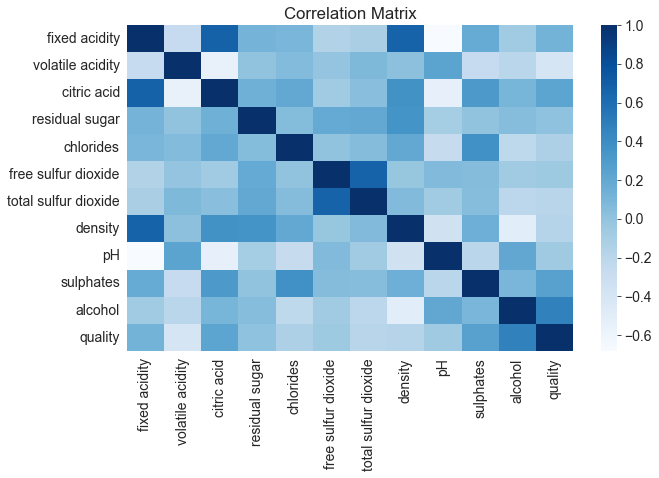

In [20]:
sns.heatmap(df.corr(), cmap='Blues', annot=False)
plt.title('Correlation Matrix');

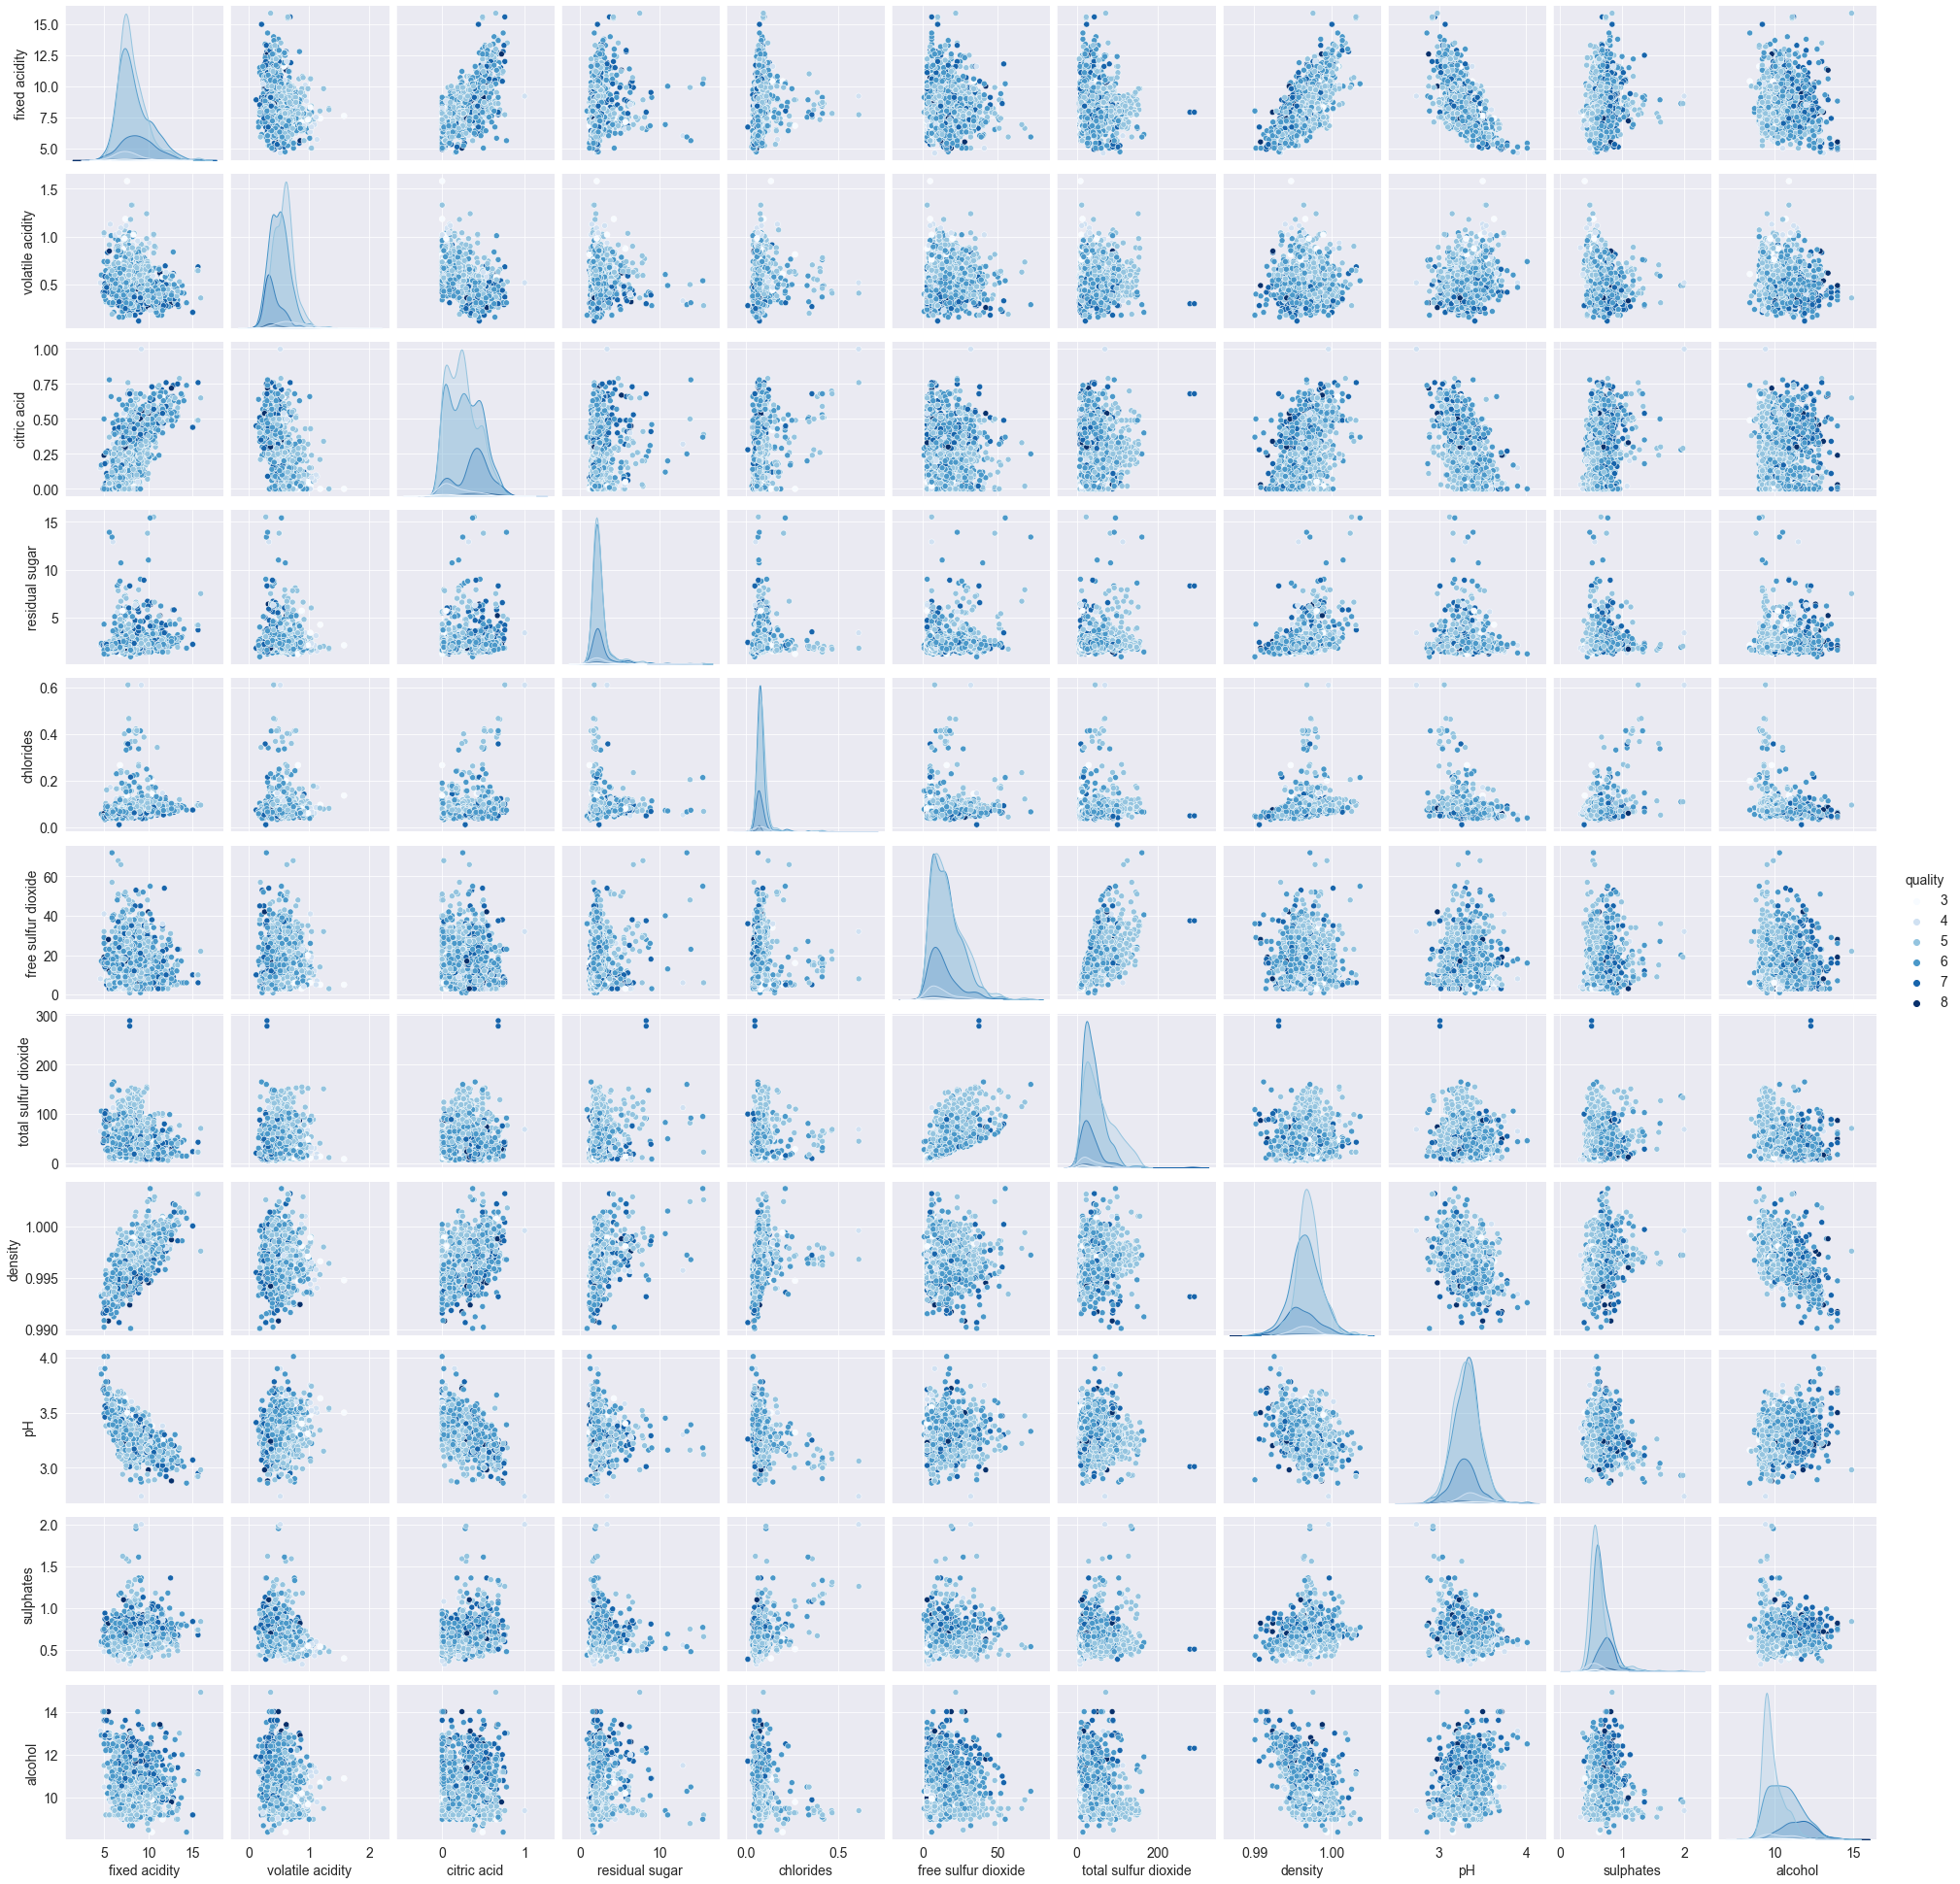

In [21]:
sns.pairplot(df, hue='quality', palette= 'Blues')

## Dataset  Preprocessing: 

In this dataset, we divide the quality column in two ranges: 
  * High-quality wine : 6-8
  * Low-quality wine: 3-5

In [22]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [23]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

The quality column has been changed into values 0 and 1, where 1 denotes high quality wines and 0 denotes the low quality wines from the dataset. 

##### creating the data:

In [24]:
X = df.drop('quality', axis = 1)
y = df['quality']

##### splitting the data into training and test sets:

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

##### standardization: 
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

But we will not use 'StandardScaler', because our dataset is not normally distributed. We will use 'MinMaxScaler' for normalizing this dataset. It transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between 0 and 1.

In [28]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [29]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

## Picking a Machine Learning Model: 

Our goal here is to use the feaure columns to predict the target column which tells us about the quality of red wines on a scale of 1-10. 

We are trying to build a machine learning model which will determine the quality of the various red wines in accordance with its different chemical properties such as acidity, density, pH, etc. 

Since we have data and labels, this is a supervised learning problem. And since we are trying to predict a category, this is a classification problem. 



 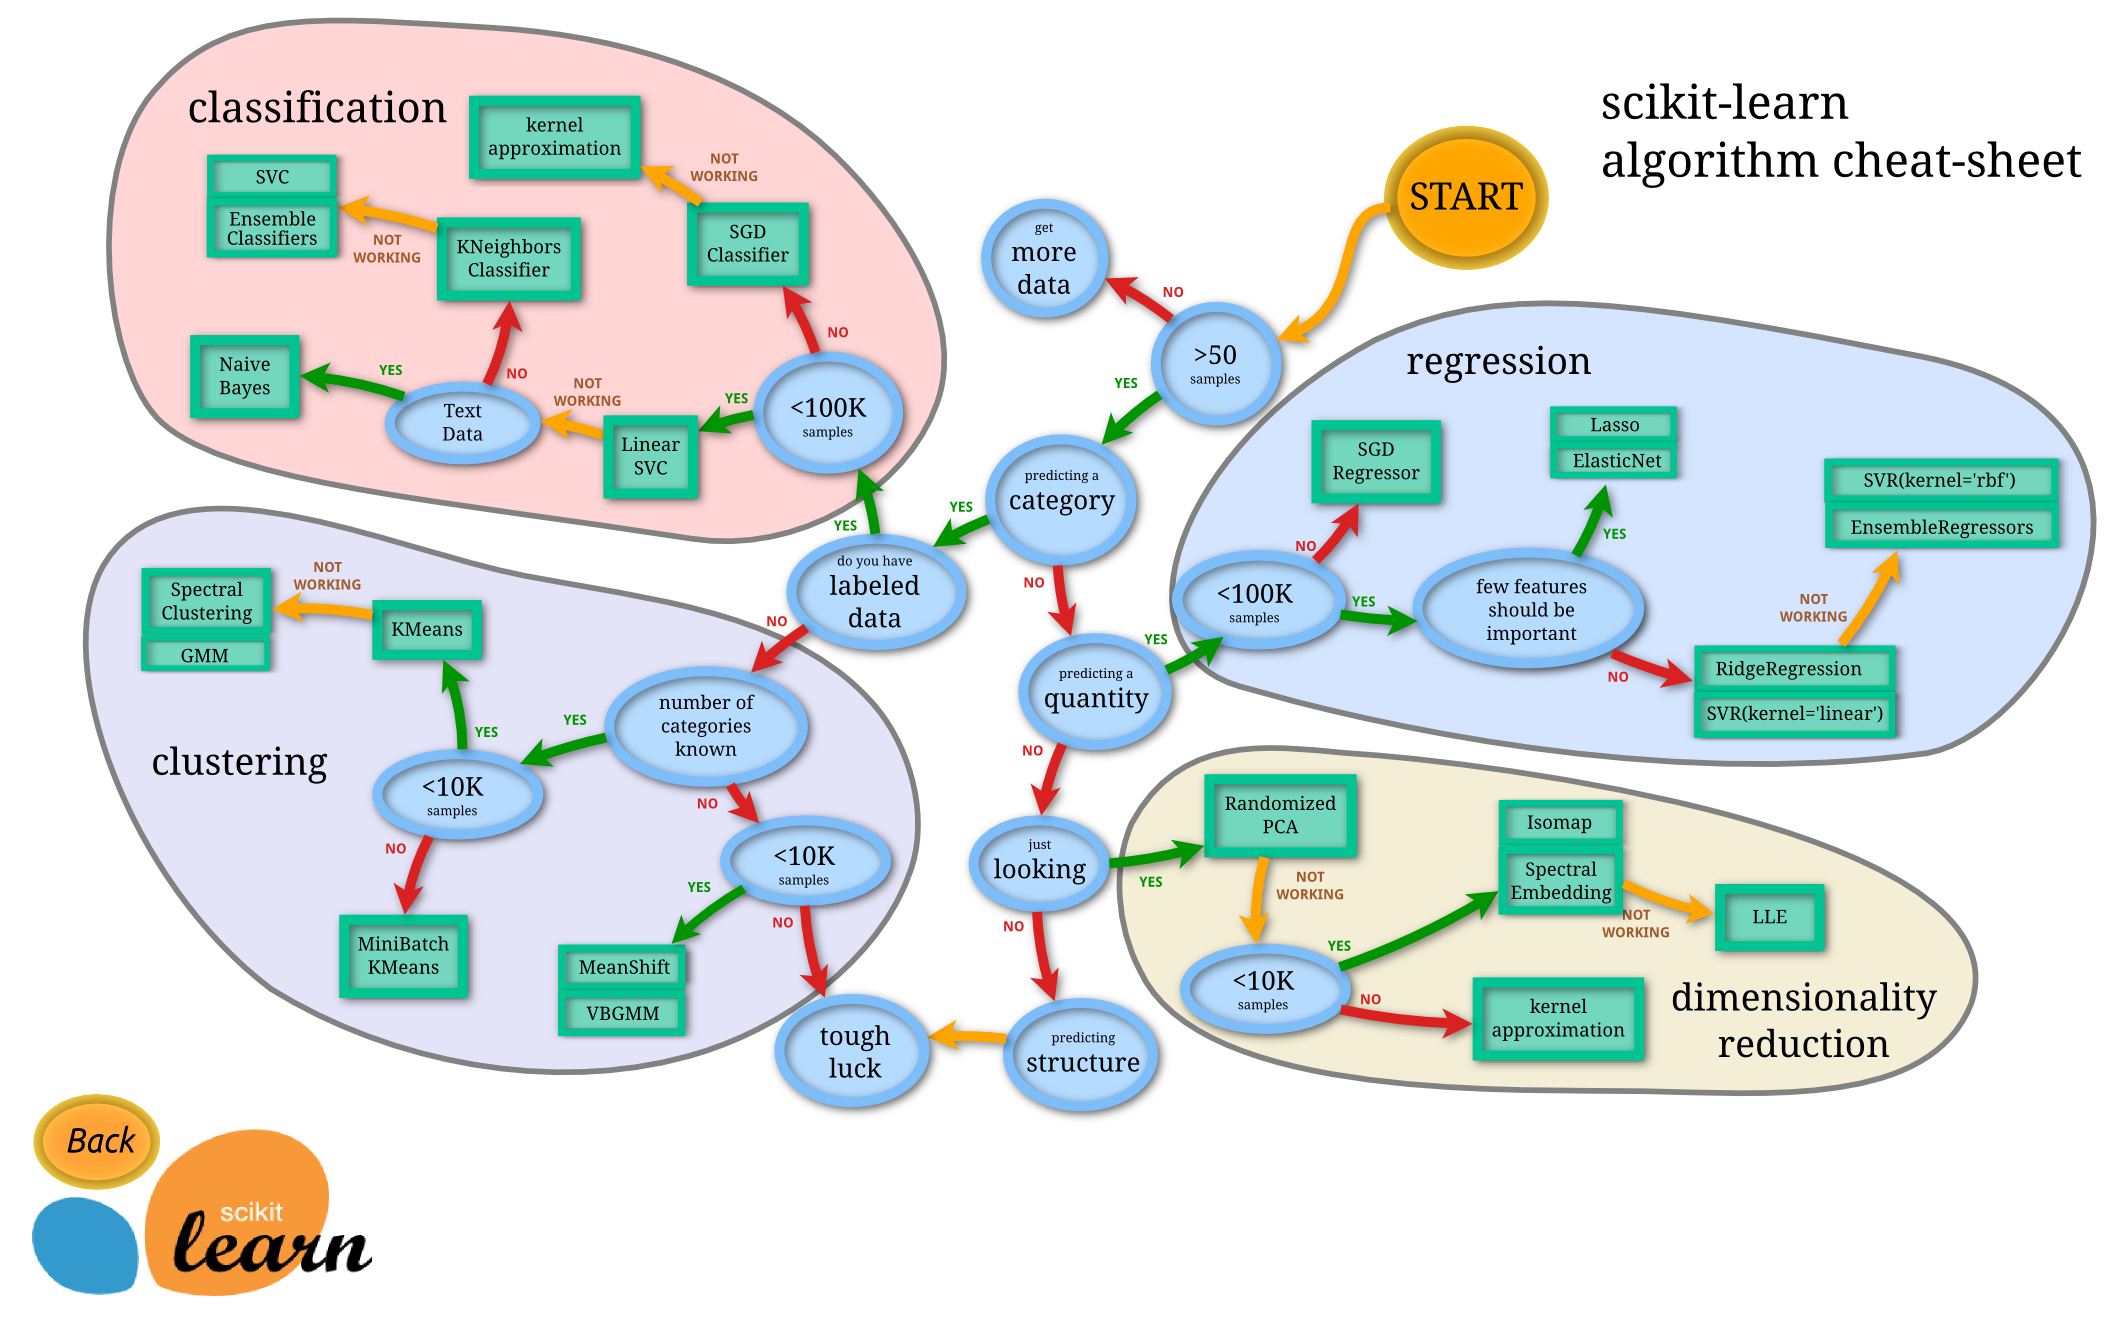
 
 The above map is used for using the right estimator. Following the map, it tells us to try LinearSVC. Let's check it out. 

## LinearSVC Model: 


In [30]:
from sklearn.svm import LinearSVC

In [31]:
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [32]:
clf.score(X_test, y_test)

0.7395833333333334

Straight out of the box, with no tuning and improvements, our model scored 73.9% accuracy. 
With this result, we'll go back to the Scikit-Learn map and see what better options we have. 

## KNeighbors Classifier Model: 

In [33]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(print_changed_only = False)

In [34]:
model = KNeighborsClassifier()

#### Hyperparameter Tuning for the KNeighbors Classifier Model: 


In [35]:
model_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

model_cv_model = GridSearchCV(model, model_params, cv = 10)
model_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### getting the best parameters for the KNeighbors Model:

In [36]:
print("Best score for train set: " + str(model_cv_model.best_score_))
print("best K value: " + str(model_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + model_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(model_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.7891007078507078
best K value: 13 
best weights: distance 
best leaf size: 25


##### building the model with the best parameters:

In [37]:
knn_model = KNeighborsClassifier(n_neighbors = model_cv_model.best_params_["n_neighbors"],
                                leaf_size = model_cv_model.best_params_["leaf_size"],
                                weights = model_cv_model.best_params_["weights"])

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [38]:
knn_model.score(X_test, y_test)

0.7770833333333333

The KNeighborsClassifier Model with K = 13, gives us an accuracy of 77.70%. Let's go back to the map and see if there is a better model available, assuming this model did not work upto our expectations.


## RandomForest Classifier Model:

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()

#### Hyperparameter Tuning for the RandomForest Classifier Model:

In [41]:
grid = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

rf_cv_model = GridSearchCV(estimator = rf, param_grid = grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              

##### getting the best parameters for the RandomForest Classifier Model: 

In [43]:
rf_cv_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1500}

##### building the model with the best parameters: 

In [46]:
rf_model = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 4, n_estimators = 1500)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=1500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [47]:
rf_model.score(X_test, y_test)

0.8104166666666667

The Random Forest Classifier Model gives us an accuracy of 81.04%, which is the highest accuracy among all the classfication model.
Thus, this model turns out to be the best fit for the prediction of the quality of red wine. 

## Evaluating the Model: 

Since our RandomForestClassifier Model turned out to be the best machine learning model for our dataset, let's perform some classification model evaluation metrics on our dataset and the rd_model used above. 

### Accuracy: 
Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. 

In [48]:
from sklearn.model_selection import cross_val_score

##### printing the accuracy of the machine learning model as percentage: 

In [49]:
print(f"Red Wine Quality Classifier Accuracy: {rf_model.score(X_test, y_test) * 100:.2f}%")

Red Wine Quality Classifier Accuracy: 81.04%


### Area Under Receiver Operating Characteristic (ROC) Curve: 
It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [51]:
from sklearn.metrics import roc_curve

In [53]:
y_probs = rf_model.predict_proba(X_test)
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00434783, 0.00434783, 0.00869565, 0.00869565, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.0173913 , 0.0173913 , 0.02173913, 0.02173913, 0.02608696,
       0.02608696, 0.02608696, 0.03043478, 0.03043478, 0.03043478,
       0.03043478, 0.03043478, 0.03043478, 0.03478261, 0.03478261,
       0.03913043, 0.03913043, 0.04782609, 0.04782609, 0.05217391,
       0.05217391, 0.06521739, 0.06521739, 0.06956522, 0.06956522,
       0.07391304, 0.07391304, 0.07826087, 0.07826087, 0.07826087,
       0.07826087, 0.09130435, 0.09130435, 0.09565217, 0.09565217,
       0.09565217, 0.09565217, 0.10434783, 0.10869565, 0.10869565,
       0.1173913 , 0.1173913 , 0.1173913 , 0.12173913, 0.12173913,
       0.12608696, 0.12608696, 0.13043478, 0.13043478, 0.13478261,
       0.13478261, 0.14347826, 0.14347826, 0.14782609, 0.14782609,
       0.15217391, 0.15217391, 0.15652174, 0.15652174, 0.16086

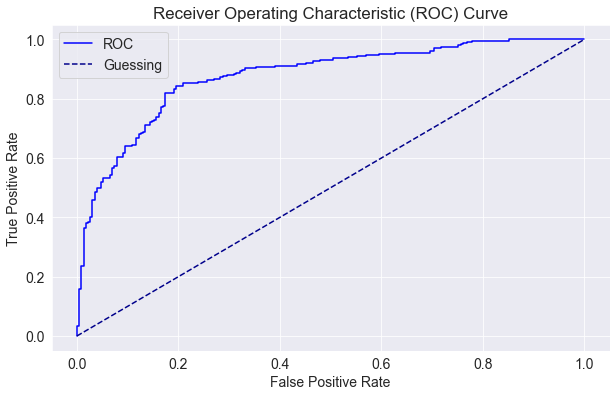

In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

The ROC Curve tells us that our model is doing much better than just guessing. 

A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve).
The maximum ROC AUC score you can achieve is 1.0 and generally, the closer to 1.0, the better the model.

The most ideal position for a ROC curve to run along the top left corner of the plot.
This would mean the model predicts only true positives and no false positives, and would result in a ROC AUC score of 1.0.

In reality, though, a perfect ROC Curve is unlikely.

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.876

### Confusion Matrix: 
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [56]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[170,  60],
       [ 65, 185]], dtype=int64)

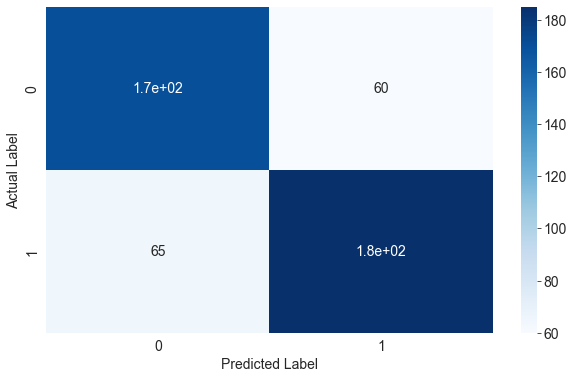

In [59]:
confusion_matrix = pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.show()

### Classification Report: 
A classification report is more so a collection of metrics rather than a single one.

It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.


* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.


* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.


* Support - The number of samples each metric was calculated on.


* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.


* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.


* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class.

In [60]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       230
           1       0.76      0.74      0.75       250

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

